In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math

In [2]:
fifa = pd.read_csv('fifa21_train.csv')
pd.set_option('display.max_columns', None)
#fifa

In [3]:
#fifa.describe().T

In [4]:
#pd.set_option('display.max_rows', len(fifa.columns))
#fifa.dtypes

In [5]:
#pd.reset_option('display.max_rows')

In [6]:
fifa = fifa.drop_duplicates()

In [ ]:
# we decided on removing some of the object columns that we thought are not needed for the model(or the info is conveyed in another column).

In [7]:
fifa_new = fifa.drop(columns=['Name', 'Age', 'Nationality', 'Club', 'Position', 'Team & Contract', 'Height', 'Weight', 'foot', 'Joined', 'Loan Date End', 'Wage', 'Release Clause', 'Contract', 'W/F', 'SM', 'A/W', 'D/W'])

In [8]:
#pd.set_option('display.max_rows', len(fifa.columns))
#fifa_new.dtypes

In [9]:
#pd.reset_option('display.max_rows')

In [10]:
fifa_new.columns = fifa_new.columns.str.lower().str.replace(' ', '_')
#fifa_new



In [11]:
fifa_new['ir'] = fifa_new['ir'].replace('[^0-9]', '', regex=True).astype(int)
#fifa_new


In [12]:
def convert_k_hits(value):
    if 'K' in str(value):
        return float(value.replace('K', '')) * 1000
    return value

fifa_new['hits'] = fifa_new['hits'].apply(convert_k_hits)
fifa_new['hits'] = fifa_new['hits'].astype(int)
#fifa_new

In [13]:
def convert_k_value(value):
    value = str(value).replace('€', '')
    if 'K' in value:
        return float(value.replace('K', '')) / 1000
    elif 'M' in value:
        return float(value.replace('M', ''))
    return float(value)

fifa_new['value'] = fifa_new['value'].apply(convert_k_value)
fifa_new
#fifa_new.dtypes

,id,bp,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,CM,1,0.525,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,ST,0,8.500,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,2,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,CAM,0,9.000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,2,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,CDM,13,0.275,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,1,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,CDM,8,0.725,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,1,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,LB,5,0.625,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,1,75,28,56,59,60,69,3,48+2,48+2,48+2,55+0,52+0,52+0,52+0,55+0,54+2,54+2,54+2,58+2,56+2,56+2,56+2,58+2,63+2,60+2,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,GK,4,1.600,84,12,14,13,29,16.0,96,17,15.0,19,27,18,237,40,40,38.0,65,54.0,217,50,59.0,29,64,15,101,30,22.0,15.0,15.0,19,56.0,41,12,16,13.0,347,72,67,66,70,72,1123,387,1,72,67,66,72,40,70,3,28+2,28+2,28+2,24+0,26+0,26+0,26+0,24+0,24+2,24+2,24+2,25+2,25+2,25+2,25+2,25+2,25+2,26+2,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,RM,8,1.100,286,64,66,51,64,41.0,291,71,57.0,38,58,67,388,77,76,86.0,62,87.0,278,61,71.0,64,37,45,241,27,25.0,66.0,58.0,65,58.0,62,37,12,13.0,57,13,10,11,7,16,1603,337,1,76,60,60,72,26,43,6,62+2,62+2,62+2,67+0,65+0,65+0,65+0,67+0,65+2,65+2,65+2,66+2,58+2,58+2,58+2,66+2,49+2,44+2,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,CM,7,0.000,254,64,66,51,73,NaN,284,74,NaN,63,72,75,198,71,72,NaN,55,NaN,258,61,NaN,71,64,62,241,64,61.0,63.0,NaN,53,NaN,113,55,58,NaN,81,9,24,72,24,24,1429,400,3,72,63,70,72,57,66,3,68+0,68+0,68+0,71+0,68+0,68+0,68+0,71+0,72+0,72+0,72+0,71+0,71+0,71+0,71+0,71+0,66+0,68+0,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


In [14]:
fifa_new.isnull().sum()
rows_with_nulls = fifa_new[fifa_new.isnull().any(axis=1)]


In [15]:
rows_with_nulls = fifa_new[fifa_new.isnull().any(axis=1)]
rows_with_nulls

,id,bp,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
17,5203,CM,0,0.13,342,85,56,60,80,61.0,397,74,85.0,82,80,76,312,54,54,66.0,74,64.0,328,78,58.0,52,66,74,348,60,68.0,70.0,62.0,88,NaN,220,70,75,75.0,52,7,5,13,12,15,1999,404,3,54,67,78,73,71,61,3,66+1,66+1,66+1,72+-1,69+1,69+1,69+1,72+-1,71+0,71+0,71+0,72+-1,72+-1,72+-1,72+-1,72+-1,72+-1,71+0,71+0,71+0,72+-1,70+1,70+1,70+1,70+1,70+1,14+1,71
32,181913,CB,3,0.00,151,27,21,53,50,NaN,154,41,NaN,32,35,46,188,65,61,NaN,62,NaN,151,27,NaN,50,53,21,190,69,42.0,39.0,NaN,40,NaN,125,61,64,NaN,68,5,21,35,21,21,1027,285,1,63,24,39,46,58,55,4,36+0,36+0,36+0,43+0,36+0,36+0,36+0,43+0,44+0,44+0,44+0,43+0,48+0,48+0,48+0,43+0,54+0,52+0,52+0,52+0,54+0,55+0,57+0,57+0,57+0,55+0,21+0,60
44,4233,CM,4,0.00,271,60,62,66,83,NaN,293,66,NaN,74,74,79,189,65,64,NaN,60,NaN,294,73,NaN,80,72,69,298,69,81.0,70.0,NaN,78,NaN,139,71,68,NaN,71,8,21,74,21,21,1555,420,2,64,67,74,70,71,74,4,71+0,71+0,71+0,72+0,71+0,71+0,71+0,72+0,74+0,74+0,74+0,72+0,77+0,77+0,77+0,72+0,73+0,75+0,75+0,75+0,73+0,74+0,72+0,72+0,72+0,74+0,24+0,76
369,199090,ST,0,0.55,303,57,61,74,54,57.0,296,67,59.0,53,51,66,342,72,72,67.0,65,66.0,318,65,84.0,49,59,61,263,49,37.0,69.0,57.0,51,NaN,73,20,29,24.0,60,15,8,14,8,15,1655,344,1,72,62,55,67,32,56,3,65+0,65+0,65+0,64+0,65+0,65+0,65+0,64+0,62+0,62+0,62+0,62+0,56+0,56+0,56+0,62+0,48+0,46+0,46+0,46+0,48+0,47+0,44+0,44+0,44+0,47+0,18+0,65
396,136138,CAM,0,9.50,363,81,66,53,83,80.0,419,84,85.0,85,82,83,385,75,74,81.0,71,84.0,350,74,75.0,65,61,75,329,61,34.0,70.0,80.0,84,NaN,96,26,36,34.0,45,6,6,5,14,14,1987,407,3,74,71,82,83,34,63,13,71+1,71+1,71+1,78+1,76+1,76+1,76+1,78+1,78+1,78+1,78+1,78+1,74+1,74+1,74+1,78+1,60+1,59+1,59+1,59+1,60+1,56+1,48+1,48+1,48+1,56+1,16+1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11555,176761,ST,11,0.00,255,52,73,82,48,NaN,208,63,NaN,42,35,68,210,72,72,NaN,66,NaN,289,74,NaN,72,76,67,257,67,57.0,78.0,NaN,55,NaN,62,25,37,NaN,71,11,20,35,20,20,1352,368,3,72,71,45,65,42,73,4,72+0,72+0,72+0,61+0,72+0,72+0,72+0,61+0,61+0,61+0,61+0,61+0,57+0,57+0,57+0,61+0,51+0,60+0,60+0,60+0,51+0,54+0,54+0,54+0,54+0,54+0,24+0,70
11580,146692,LW,0,3.70,373,77,75,66,80,75.0,396,79,82.0,81,76,78,358,67,69,77.0,71,74.0,335,72,62.0,58,65,78,335,65,35.0,74.0,77.0,84,NaN,75,25,25,25.0,48,12,7,13,8,8,1920,393,1,68,75,78,78,31,63,3,73+0,73+0,73+0,76+0,75+0,75+0,75+0,76+0,76+0,76+0,76+0,75+0,69+0,69+0,69+0,75+0,55+0,59+0,59+0,59+0,55+0,50+0,46+0,46+0,46+0,50+0,13+0,76
11650,13940,ST,2,0.00,302,57,84,86,75,NaN,220,56,NaN,42,43,79,208,60,67,NaN,81,NaN,324,87,NaN,68,94,75,302,69,72.0,85.0,NaN,76,NaN,65,23,42,NaN,159,38,41,43,41,39,1580,401,3,64,82,59,68,47,81,3,78+0,78+0,78+0,67+0,78+0,78+0,78+0,67+0,70+0,70+0,70+0,67+0,68+0,68+0,68+0,67+0,56+0,70+0,70+0,70+0,56+0,62+0,58+0,58+0,58+0,62+0,46+0,78
11680,150525,ST,0,0.00,376,67,78,83,72,76.0,320,78,65.0,31,63,83,335,66,69,63.0,72,65.0,358,77,80.0,51,84,66,330,70,35.0,78.0,70.0,77,NaN,71,25,21,25.0,48,10,13,6,10,9,1838,392,3,68,75,67,77,32,73,6,77+1,77+1,77+1,73+1,75+1,75+1,75+1,73+1,74+1,74+1,74+1,71+1,65+1,65+1,65+1,71+1,53+1,57+1,57+1,57+1,53+1,50+1,50+1,50+1,50+1,50+1,14+1,78


In [16]:
#Decided to drop the 41 rows with the NaN values
fifa_new = fifa_new.dropna(subset=['volleys'])
fifa_new.isnull().sum()


id           0
bp           0
growth       0
value        0
attacking    0
            ..
cb           0
rcb          0
rb           0
gk           0
ova          0
Length: 83, dtype: int64

In [17]:
fifa_new = fifa_new.fillna({'composure': fifa_new['composure'].median()})
#fifa_new
#fifa_new.isnull().sum()

In [18]:
fifa_new

,id,bp,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,CM,1,0.525,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,ST,0,8.500,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,2,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,CAM,0,9.000,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,2,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,CDM,13,0.275,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,1,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,CDM,8,0.725,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,1,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,196848,ST,0,0.550,290,36,72,65,57,60.0,283,62,56.0,56,46,63,368,67,65,76.0,71,89.0,303,64,58.0,56,60,65,254,50,33.0,64.0,37.0,70,60.0,80,41,19,20.0,60,12,13,8,13,14,1638,337,1,66,68,47,66,33,57,4,65+0,65+0,65+0,61+0,63+0,63+0,63+0,61+0,60+2,60+2,60+2,58+2,53+2,53+2,53+2,58+2,46+2,45+2,45+2,45+2,46+2,44+2,43+2,43+2,43+2,44+2,19+2,65
11696,232504,LB,5,0.625,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,1,75,28,56,59,60,69,3,48+2,48+2,48+2,55+0,52+0,52+0,52+0,55+0,54+2,54+2,54+2,58+2,56+2,56+2,56+2,58+2,63+2,60+2,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,GK,4,1.600,84,12,14,13,29,16.0,96,17,15.0,19,27,18,237,40,40,38.0,65,54.0,217,50,59.0,29,64,15,101,30,22.0,15.0,15.0,19,56.0,41,12,16,13.0,347,72,67,66,70,72,1123,387,1,72,67,66,72,40,70,3,28+2,28+2,28+2,24+0,26+0,26+0,26+0,24+0,24+2,24+2,24+2,25+2,25+2,25+2,25+2,25+2,25+2,26+2,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,RM,8,1.100,286,64,66,51,64,41.0,291,71,57.0,38,58,67,388,77,76,86.0,62,87.0,278,61,71.0,64,37,45,241,27,25.0,66.0,58.0,65,58.0,62,37,12,13.0,57,13,10,11,7,16,1603,337,1,76,60,60,72,26,43,6,62+2,62+2,62+2,67+0,65+0,65+0,65+0,67+0,65+2,65+2,65+2,66+2,58+2,58+2,58+2,66+2,49+2,44+2,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67


In [19]:
#Decided to drop the values after the + or -
positions =  ['LS', 'ST', 'RS', 'LW', 'LF', 'CF',  'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LWB', 'LDM', 'LCM', 'CM', 'RCM', 'RM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']
l_positions = [item.lower() for item in positions]
for col in l_positions:
    fifa_new[col] = fifa_new[col].replace(r'[+-]\d*$', '', regex=True)
    fifa_new[col] = fifa_new[col].replace(r'\+$', '', regex=True)
    fifa_new[col] = fifa_new[col].astype(float)

#fifa_new


/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_80113/3006842357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fifa_new.corr()
/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_80113/3006842357.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = fifa_new.corr()


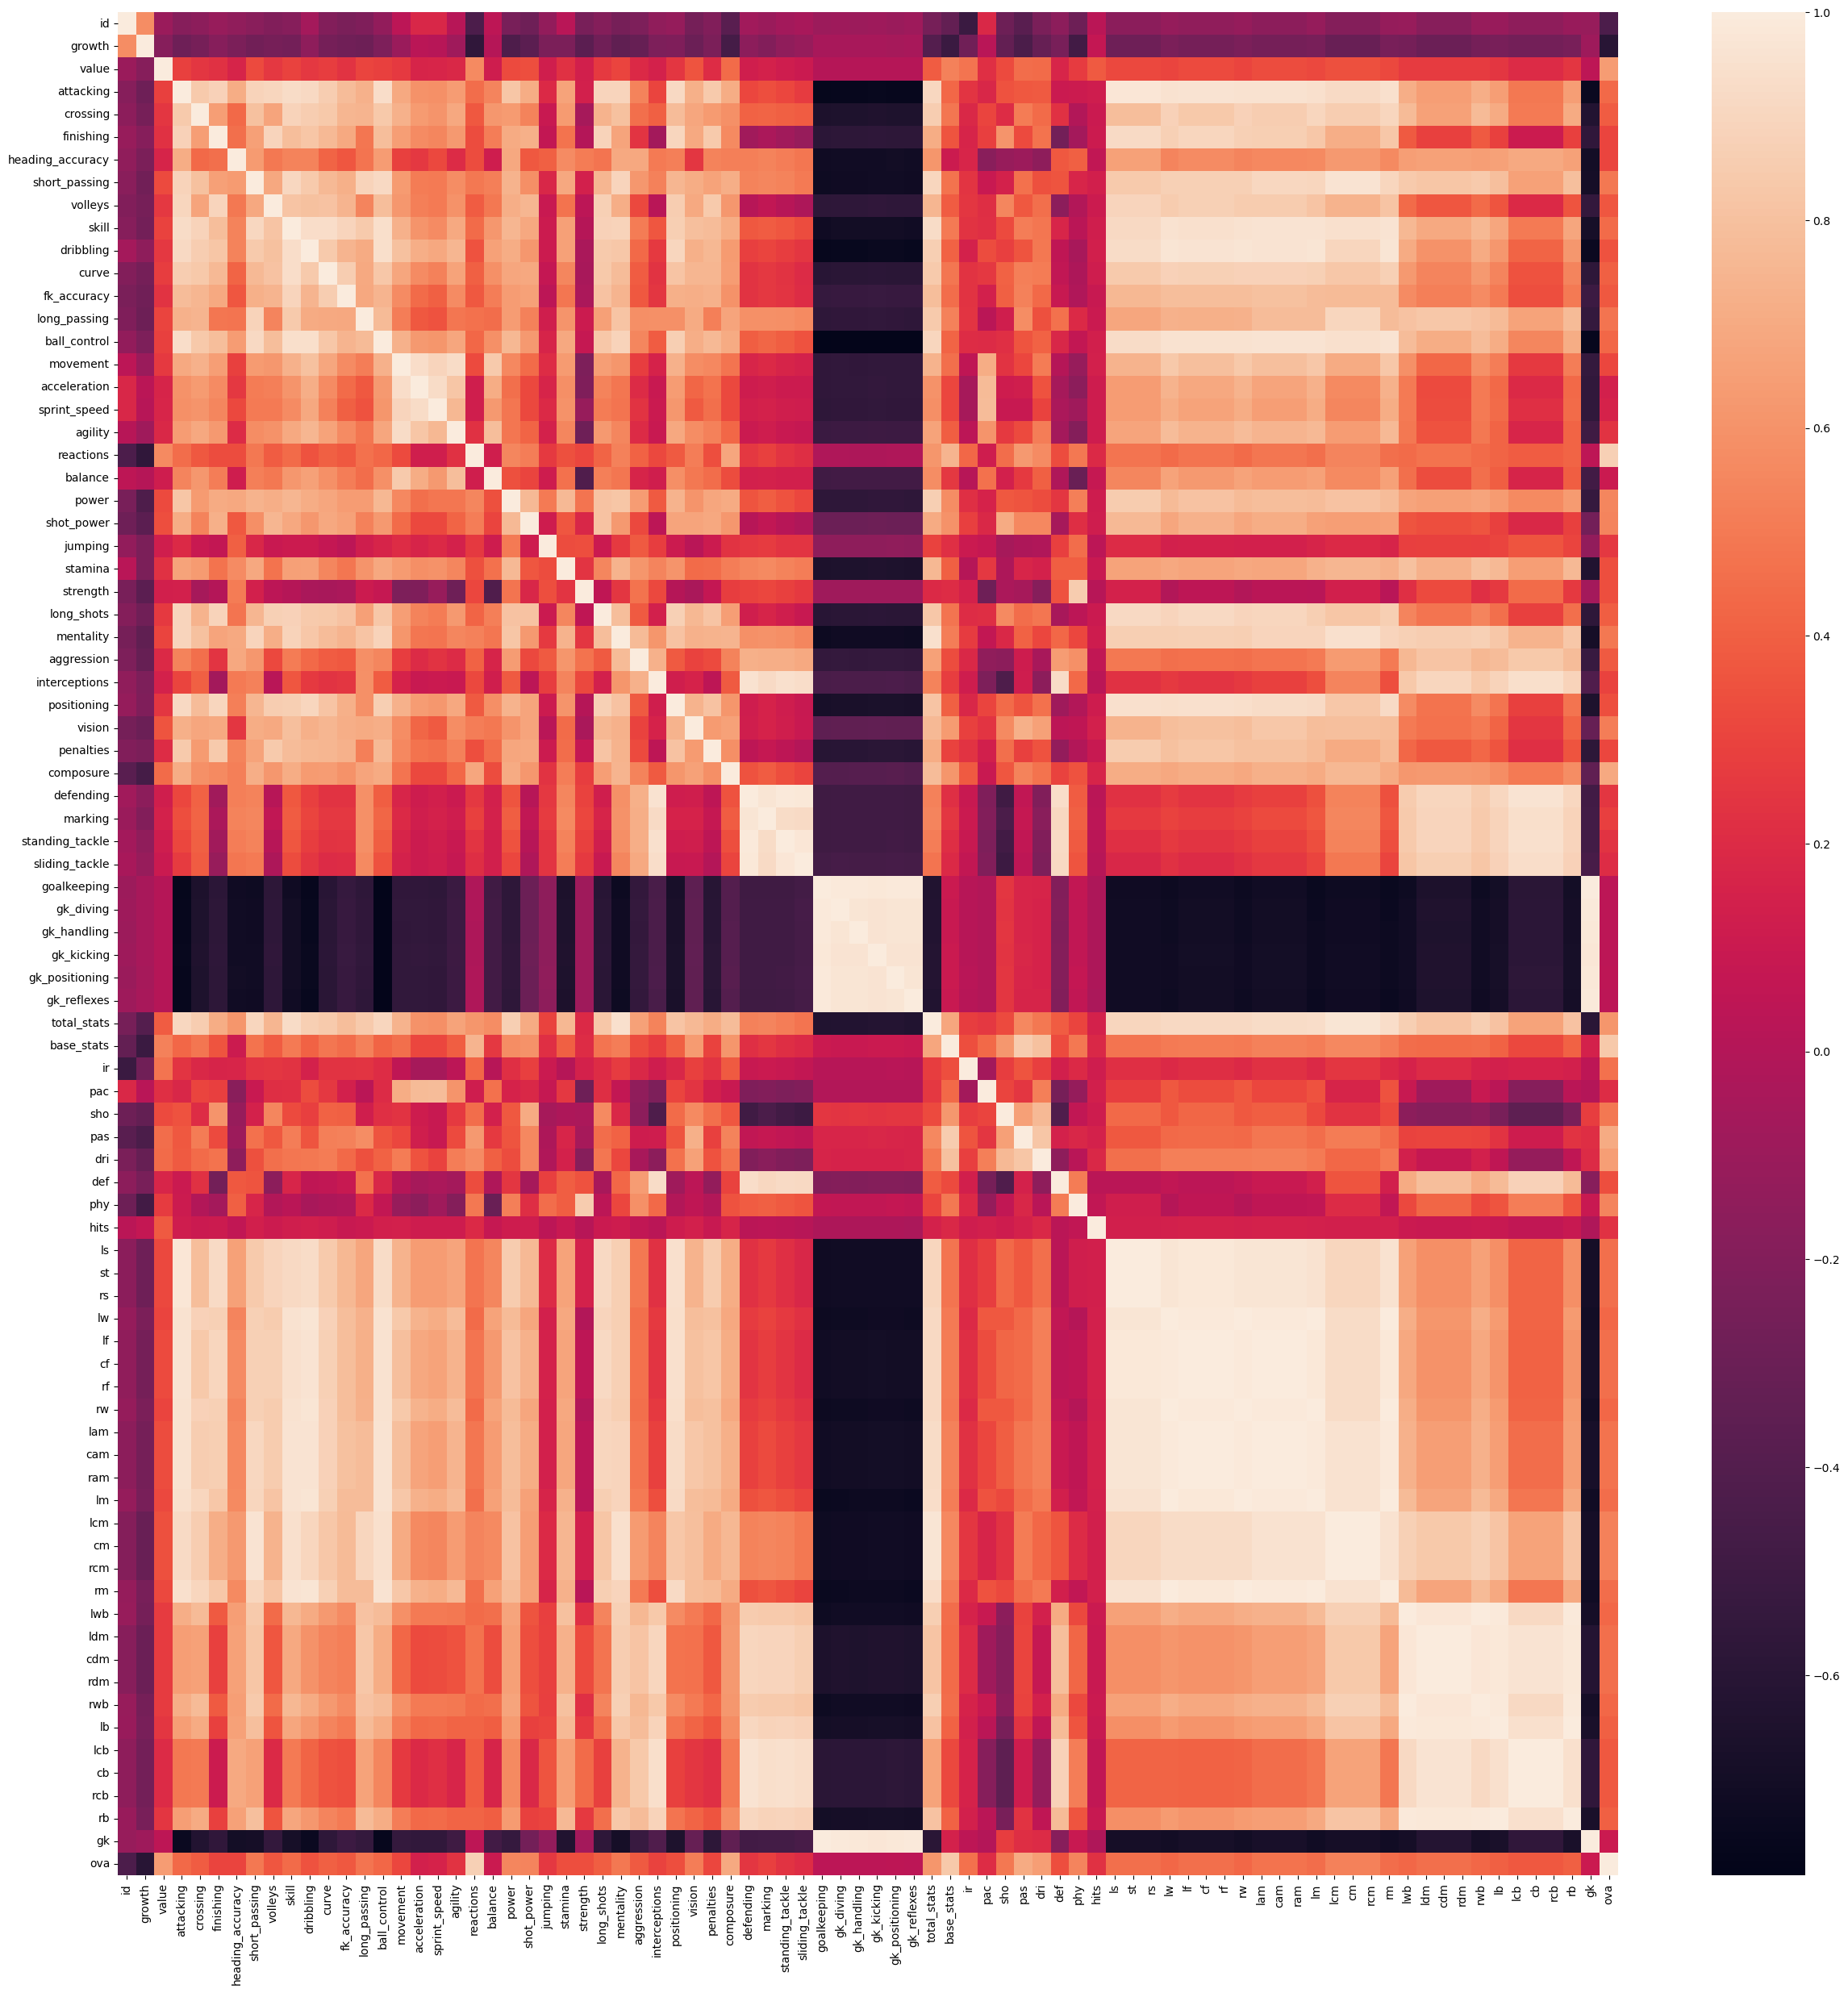

In [42]:
fifa_new.corr()
correlations_matrix = fifa_new.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlations_matrix, annot=False)
plt.show()

# Preparation for the model

In [20]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [21]:
y = fifa_new['ova']
X = fifa_new.drop(['ova','id'], axis=1)

In [22]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [23]:
MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())

,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0.038462,0.005833,0.546835,0.545455,0.478261,0.431818,0.710843,0.465116,0.569087,0.615385,0.444444,0.561798,0.642857,0.637363,0.663818,0.607143,0.729412,0.573171,0.591549,0.8125,0.556270,0.602410,0.685714,0.694118,0.454545,0.455556,0.654596,0.517241,0.552941,0.645161,0.682353,0.534884,0.500000,0.518219,0.516854,0.595238,0.440476,0.084309,0.056818,0.116279,0.139535,0.076923,0.045455,0.604577,0.492366,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.500000,0.000000,0.565789,0.565789,0.565789,0.602564,0.602564,0.602564,0.602564,0.602564,0.610390,0.610390,0.610390,0.631579,0.643836,0.643836,0.643836,0.631579,0.642857,0.614286,0.614286,0.614286,0.642857,0.637681,0.527778,0.527778,0.527778,0.637681,0.075949
1,0.000000,0.094444,0.817722,0.681818,0.826087,0.806818,0.686747,0.837209,0.777518,0.857143,0.822222,0.752809,0.642857,0.813187,0.829060,0.833333,0.847059,0.902439,0.718310,0.7250,0.768489,0.746988,0.800000,0.741176,0.701299,0.711111,0.718663,0.517241,0.329412,0.817204,0.729412,0.790698,0.690476,0.230769,0.359551,0.166667,0.190476,0.100703,0.102273,0.058140,0.139535,0.054945,0.159091,0.781945,0.702290,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.666667,0.004458,0.815789,0.815789,0.815789,0.807692,0.794872,0.794872,0.794872,0.807692,0.779221,0.779221,0.779221,0.802632,0.712329,0.712329,0.712329,0.802632,0.614286,0.528571,0.528571,0.528571,0.614286,0.565217,0.444444,0.444444,0.444444,0.565217,0.113924
2,0.000000,0.100000,0.744304,0.761364,0.793478,0.329545,0.807229,0.825581,0.892272,0.879121,0.944444,0.966292,0.773810,0.879121,0.886040,0.845238,0.764706,0.963415,0.760563,0.9500,0.562701,0.807229,0.128571,0.741176,0.285714,0.822222,0.771588,0.758621,0.247059,0.838710,0.800000,0.755814,0.833333,0.242915,0.224719,0.273810,0.261905,0.021077,0.045455,0.011628,0.046512,0.010989,0.011364,0.759059,0.671756,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.439394,0.007611,0.763158,0.763158,0.763158,0.846154,0.820513,0.820513,0.820513,0.846154,0.831169,0.831169,0.831169,0.842105,0.794521,0.794521,0.794521,0.842105,0.642857,0.571429,0.571429,0.571429,0.642857,0.565217,0.347222,0.347222,0.347222,0.565217,0.037975
3,0.500000,0.003056,0.506329,0.431818,0.423913,0.602273,0.614458,0.372093,0.505855,0.538462,0.411111,0.460674,0.571429,0.615385,0.481481,0.488095,0.564706,0.548780,0.436620,0.4750,0.463023,0.542169,0.500000,0.611765,0.493506,0.377778,0.562674,0.597701,0.611765,0.311828,0.517647,0.534884,0.428571,0.599190,0.584270,0.619048,0.583333,0.070258,0.068182,0.081395,0.046512,0.054945,0.113636,0.506039,0.385496,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.500000,0.000435,0.460526,0.460526,0.460526,0.474359,0.461538,0.461538,0.461538,0.474359,0.480519,0.480519,0.480519,0.500000,0.547945,0.547945,0.547945,0.500000,0.600000,0.600000,0.600000,0.600000,0.600000,0.623188,0.583333,0.583333,0.583333,0.623188,0.063291
4,0.307692,0.008056,0.524051,0.488636,0.369565,0.636364,0.686747,0.348837,0.555035,0.648352,0.444444,0.449438,0.619048,0.670330,0.601140,0.630952,0.647059,0.573171,0.535211,0.6500,0.472669,0.590361,0.128571,0.811765,0.532468,0.433333,0.665738,0.655172,0.647059,0.569892,0.635294,0.476744,0.547619,0.668016,0.617978,0.654762,0.714286,0.093677,0.068182,0.081395,0.151163,0.032967,0.147727,0.593134,0.503817,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.590909,0.000109,0.539474,0.539474,0.539474,0.576923,0.564103,0.564103,0.564103,0

In [24]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X = pd.concat([X_normalized, X_cat_encode], axis=1)
X

,growth,value,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST
0,0.038462,0.005833,0.546835,0.545455,0.478261,0.431818,0.710843,0.465116,0.569087,0.615385,0.444444,0.561798,0.642857,0.637363,0.663818,0.607143,0.729412,0.573171,0.591549,0.8125,0.556270,0.602410,0.685714,0.694118,0.454545,0.455556,0.654596,0.517241,0.552941,0.645161,0.682353,0.534884,0.500000,0.518219,0.516854,0.595238,0.440476,0.084309,0.056818,0.116279,0.139535,0.076923,0.045455,0.604577,0.492366,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.500000,0.000000,0.565789,0.565789,0.565789,0.602564,0.602564,0.602564,0.602564,0.602564,0.610390,0.610390,0.610390,0.631579,0.643836,0.643836,0.643836,0.631579,0.642857,0.614286,0.614286,0.614286,0.642857,0.637681,0.527778,0.527778,0.527778,0.637681,0.075949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.094444,0.817722,0.681818,0.826087,0.806818,0.686747,0.837209,0.777518,0.857143,0.822222,0.752809,0.642857,0.813187,0.829060,0.833333,0.847059,0.902439,0.718310,0.7250,0.768489,0.746988,0.800000,0.741176,0.701299,0.711111,0.718663,0.517241,0.329412,0.817204,0.729412,0.790698,0.690476,0.230769,0.359551,0.166667,0.190476,0.100703,0.102273,0.058140,0.139535,0.054945,0.159091,0.781945,0.702290,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.666667,0.004458,0.815789,0.815789,0.815789,0.807692,0.794872,0.794872,0.794872,0.807692,0.779221,0.779221,0.779221,0.802632,0.712329,0.712329,0.712329,0.802632,0.614286,0.528571,0.528571,0.528571,0.614286,0.565217,0.444444,0.444444,0.444444,0.565217,0.113924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.100000,0.744304,0.761364,0.793478,0.329545,0.807229,0.825581,0.892272,0.879121,0.944444,0.966292,0.773810,0.879121,0.886040,0.845238,0.764706,0.963415,0.760563,0.9500,0.562701,0.807229,0.128571,0.741176,0.285714,0.822222,0.771588,0.758621,0.247059,0.838710,0.800000,0.755814,0.833333,0.242915,0.224719,0.273810,0.261905,0.021077,0.045455,0.011628,0.046512,0.010989,0.011364,0.759059,0.671756,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.439394,0.007611,0.763158,0.763158,0.763158,0.846154,0.820513,0.820513,0.820513,0.846154,0.831169,0.831169,0.831169,0.842105,0.794521,0.794521,0.794521,0.842105,0.642857,0.571429,0.571429,0.571429,0.642857,0.565217,0.347222,0.347222,0.347222,0.565217,0.037975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.500000,0.003056,0.506329,0.431818,0.423913,0.602273,0.614458,0.372093,0.505855,0.538462,0.411111,0.460674,0.571429,0.615385,0.481481,0.488095,0.564706,0.548780,0.436620,0.4750,0.463023,0.542169,0.500000,0.611765,0.493506,0.377778,0.562674,0.597701,0.611765,0.311828,0.517647,0.534884,0.428571,0.599190,0.584270,0.619048,0.583333,0.070258,0.068182,0.081395,0.046512,0.054945,0.113636,0.506039,0.385496,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.500000,0.000435,0.460526,0.460526,0.460526,0.474359,0.461538,0.461538,0.461538,0.474359,0.480519,0.480519,0.480519,0.500000,0.547945,0.547945,0.547945,0.500000,0.600000,0.600000,0.600000,0.600000,0.600000,0.623188,0.583333,0.583333,0.583333,0.623188,0.063291,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.307692,0.008056,0.524051,0.488636,0.369565,0.636364,0.686747,0.348837,0.555035,0.648352,0.444444,0.449438,0.619048,0.670330,0.601140,0.630952,0.647059,0.573171,0.535211,0.6500,0.472669,0.590361,0.128571,0.811765,0.532468,0

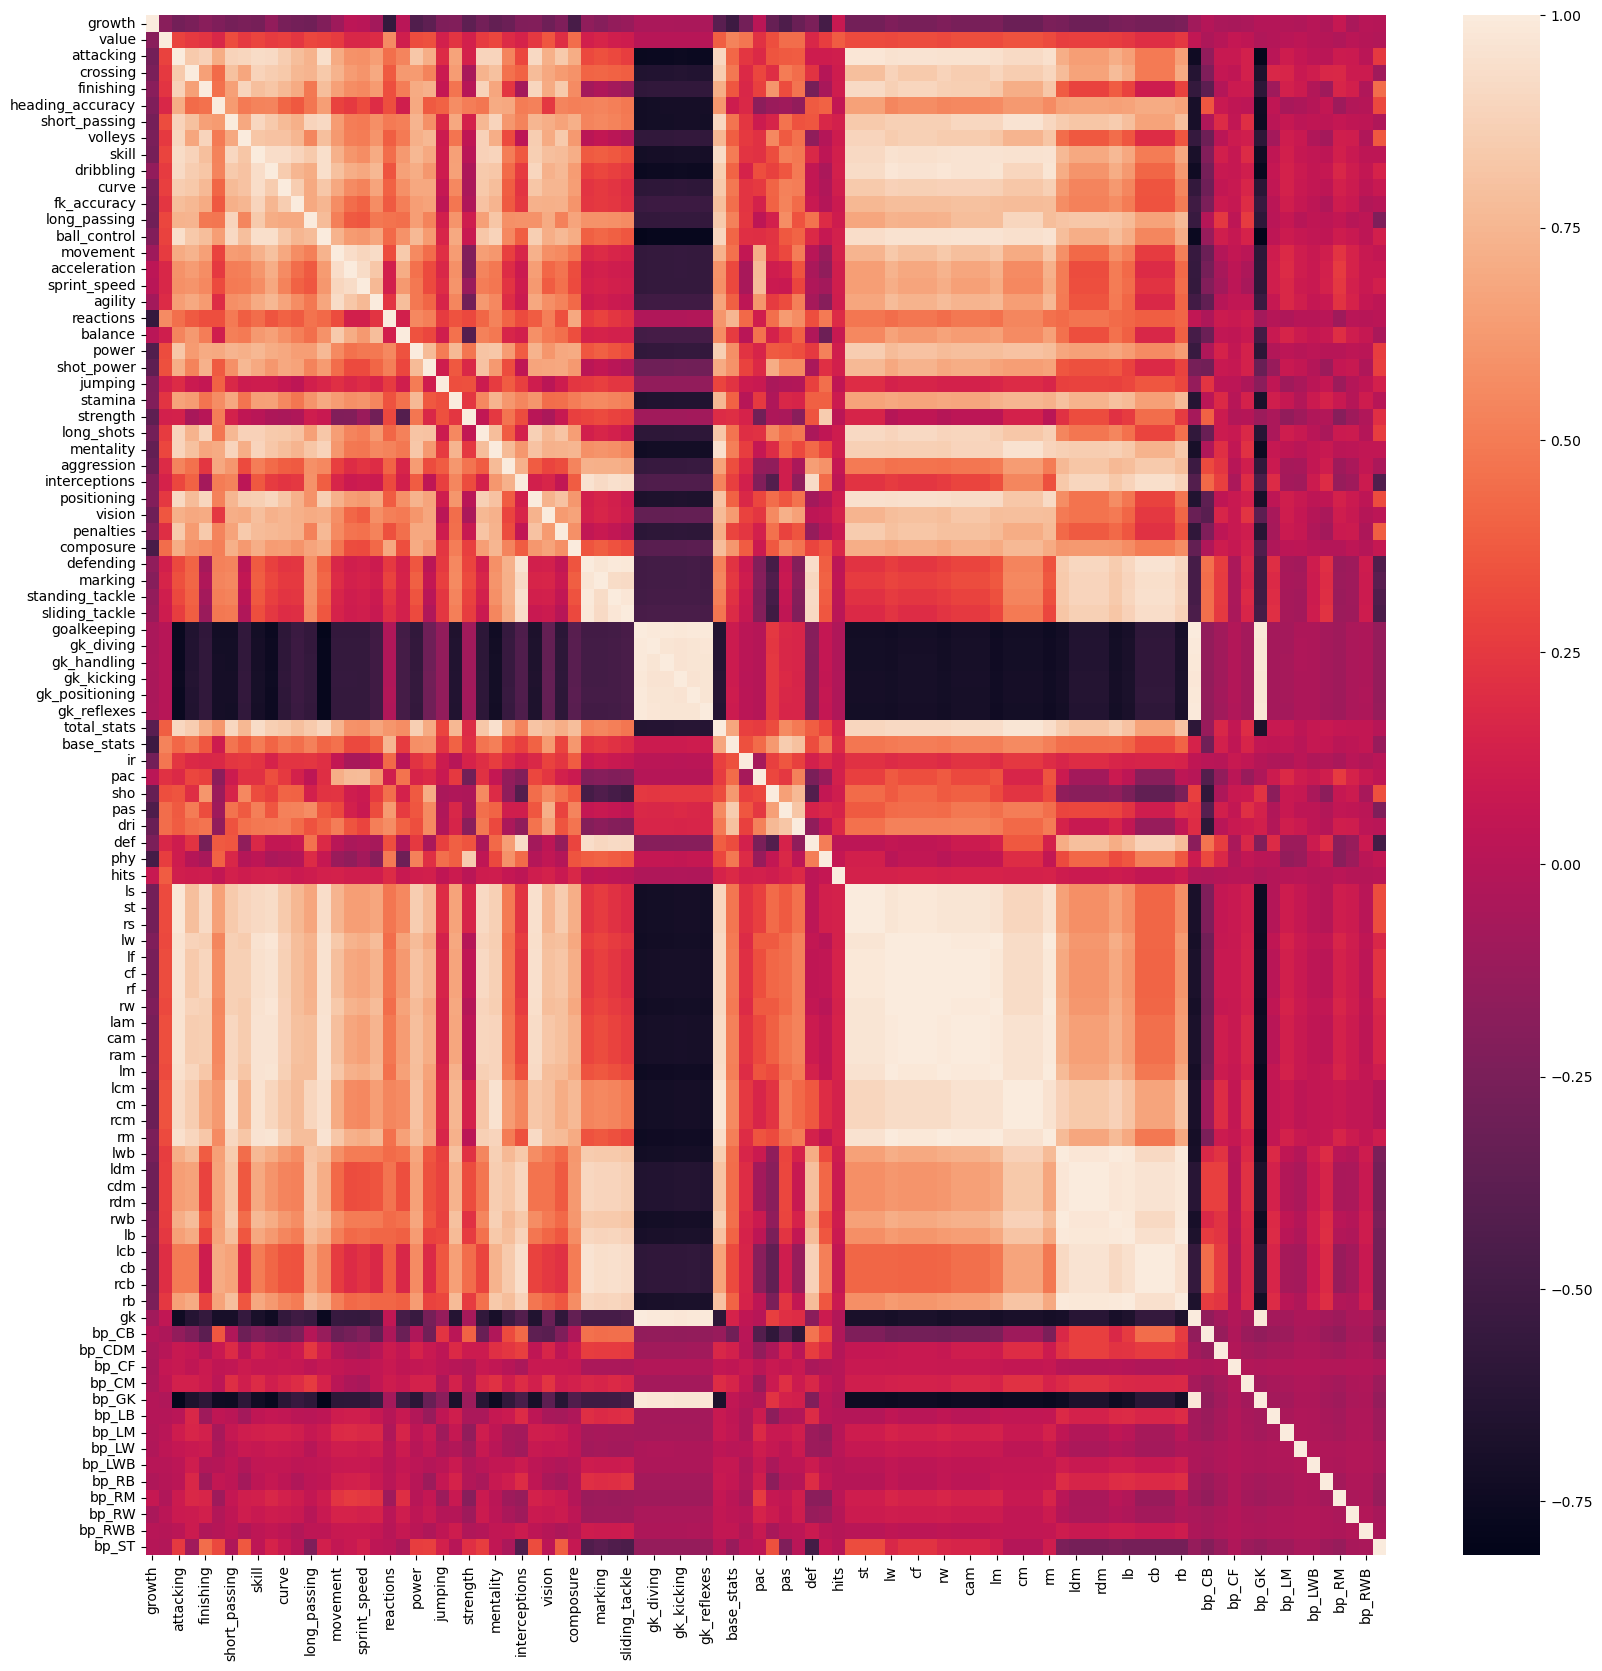

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9328, 94)
(2332, 94)
(9328,)
(2332,)


In [28]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
predictions_test = lm.predict(X_test)
mse = round(mean_squared_error(y_test,predictions_test), 2)
rmse = round(np.sqrt(mse), 2)
r2 = round(r2_score(y_test, predictions_test), 2)
mae = round(mean_absolute_error(y_test, predictions_test), 2)
print("mse =",mse)
print("rmse =",rmse)
print("r2 score =",r2)
print("mae =",mae)

mse = 4.66
rmse = 2.16
r2 score = 0.9
mae = 1.7
